In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random

In [37]:
def generate_label(row):
    for name, value in row.items():
        label = random.random()*value
    return label + random.random()
def generate_data(num_features, num_size):
    np.random.seed(42)
    cols = []
    for i in range(1,num_features+1):
        cols.append('X_' + str(i))
    df = pd.DataFrame(np.random.rand(num_size, num_features), columns=cols)
    df['label'] = df.apply(generate_label,axis=1)
    return df
all_df = generate_data(10,1000)

In [38]:
from sklearn.model_selection import train_test_split
def split_data(df,label_column):
    X = df.copy()
    y = df[label_column]
    X.drop(columns=label_column,inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data(all_df,'label')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
def linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

    
    df_feature_imp = pd.DataFrame({'variable':X_train.columns, 'imp':model.coef_})
    print('Feature Importance:\n', df_feature_imp)

    print('R-squared:', model.score(X_test, y_test))

    model_predictions = model.predict(X_test)
    print('RMSE: ', math.sqrt(mean_squared_error(y_test,model_predictions)))
linear_regression(X_train, X_test, y_train, y_test)

Coefficients: [ 0.0468079  -0.00069355  0.08657899 -0.0601108   0.0289736   0.0419658
 -0.10525025 -0.0255843   0.02071983  0.46226251]
Intercept: 0.5050761857539199
Feature Importance:
   variable       imp
0      X_1  0.046808
1      X_2 -0.000694
2      X_3  0.086579
3      X_4 -0.060111
4      X_5  0.028974
5      X_6  0.041966
6      X_7 -0.105250
7      X_8 -0.025584
8      X_9  0.020720
9     X_10  0.462263
R-squared: 0.17705053511035895
RMSE:  0.33987572831404134


In [20]:
from sklearn.preprocessing import StandardScaler
def linear_regression_with_scaling(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

    
    #df_feature_imp = pd.DataFrame({'variable':X_train.columns, 'imp':model.coef_})
    #print('Feature Importance:\n', df_feature_imp)

    print('R-squared:', model.score(X_test, y_test))

    model_predictions = model.predict(X_test)
    print('RMSE: ', math.sqrt(mean_squared_error(y_test,model_predictions)))
linear_regression_with_scaling(X_train, X_test, y_train, y_test)

Coefficients: [-0.02145843 -0.00055304  0.02458198 -0.01761171  0.00836133  0.01226639
 -0.02973458 -0.00739245  0.0060569   0.13148112  0.03589811]
Intercept: 0.747120880153343
R-squared: 0.17783285071889143
RMSE:  0.33971414287106855


In [8]:
import statsmodels.api as sm
def stats_linear_regression(X_train, X_test, y_train, y_test):
    X_sm_train = sm.add_constant(X_train)
    X_sm_test = sm.add_constant(X_test)
    
    model = sm.OLS(y_train, X_sm_train).fit()

    print(model.summary())

    model_predictions = model.predict(X_sm_test)
    print('RMSE: ', math.sqrt(mean_squared_error(y_test,model_predictions)))
    print(sm.OLS(y_test, model_predictions).fit().summary())
stats_linear_regression(X_train, X_test, y_train, y_test)

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     14.81
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.26e-24
Time:                        14:40:45   Log-Likelihood:                -243.81
No. Observations:                 800   AIC:                             509.6
Df Residuals:                     789   BIC:                             561.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5051      0.068      7.398      0.0

In [17]:
def quadratic_regression(X_train, X_test, y_train, y_test):
    # introducing quadratic variable
    X_train['X_11'] = X_train['X_1']*X_train['X_1']
    X_test['X_11'] = X_test['X_1']*X_test['X_1']

    model = LinearRegression()
    model.fit(X_train, y_train)

    feat_importance = pd.DataFrame({
        'feat': X_train.columns,
        'importance':model.coef_
    })
    feat_importance['importance'] = feat_importance['importance'].round(2)
    print('R-squared for test:', model.score(X_test, y_test))
    print('Feature importance:', feat_importance)
    

    model_stat = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    print(model_stat.summary())
quadratic_regression(X_train, X_test, y_train, y_test)

R-squared for test: 0.17783285071889143
Feature importance:     feat  importance
0    X_1       -0.08
1    X_2       -0.00
2    X_3        0.08
3    X_4       -0.06
4    X_5        0.03
5    X_6        0.04
6    X_7       -0.10
7    X_8       -0.03
8    X_9        0.02
9   X_10        0.46
10  X_11        0.12
                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     13.51
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           6.90e-24
Time:                        18:57:37   Log-Likelihood:                -243.53
No. Observations:                 800   AIC:                             511.1
Df Residuals:                     788   BIC:                             567.3
Df Model:                          11                   

In [32]:
from sklearn.preprocessing import LabelEncoder
def one_hot_encoding(X_train, X_test, y_train, y_test,encoding_type='label'):
    random_str = random.choices('ABC', k=len(X_train))
    X_train['X_cat'] = random_str

    random_str = random.choices('ABC', k=len(X_test))
    X_test['X_cat'] = random_str

    if encoding_type=='label':
        encoder = LabelEncoder()
        encoder.fit(X_train['X_cat'])
        X_train_cat = X_train.copy()
        X_test_cat = X_test.copy()
        X_train_cat['X_cat'] = encoder.transform(X_train['X_cat'])
        X_test_cat['X_cat'] = encoder.transform(X_test['X_cat'])
        

    elif encoding_type=='one_hot':
        X_train_cat = pd.get_dummies(X_train,columns=['X_cat'],drop_first=True)
        X_test_cat = pd.get_dummies(X_test,columns=['X_cat'],drop_first=True)
    else:
        print('Adjust Label')
        return
    
    model = LinearRegression()
    model.fit(X_train_cat,y_train)


    feat_importance = pd.DataFrame({
        'feat': X_train_cat.columns,
        'importance':model.coef_
    })
    feat_importance['importance'] = feat_importance['importance'].round(2)
    print('R-squared for test:', model.score(X_test_cat, y_test))
    print('Feature importance:', feat_importance)
one_hot_encoding(X_train, X_test, y_train, y_test)

R-squared for test: 0.17805030687298695
Feature importance:      feat  importance
0     X_1       -0.07
1     X_2       -0.00
2     X_3        0.08
3     X_4       -0.06
4     X_5        0.03
5     X_6        0.04
6     X_7       -0.10
7     X_8       -0.02
8     X_9        0.02
9    X_10        0.46
10   X_11        0.12
11  X_cat        0.01


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
def ridge_regression(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    column_names = X_train.columns
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = Ridge()
    model.fit(X_train, y_train)
    
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print('R-squared:', model.score(X_test, y_test))
    model_predictions = model.predict(X_test)
    print('RMSE: ', math.sqrt(mean_squared_error(y_test,model_predictions)))

    lambdas = np.logspace(-3,3,10)
    model_cv = RidgeCV(alphas=lambdas, cv=5)
    model_cv.fit(X_train, y_train)

    print('Best alpha for RidgeCV is:', model_cv.alpha_)

    model_alpha = Ridge(alpha=model_cv.alpha_)
    model_alpha.fit(X_train, y_train)
    print('R-squared:', model_alpha.score(X_test, y_test))

    feature_imp = pd.DataFrame({
        'feature':column_names,
        'importance':model_alpha.coef_
    })
    print(feature_imp)
ridge_regression(X_train, X_test, y_train, y_test)

Coefficients: [ 0.00163394 -0.00140457 -0.00584777 -0.01820991 -0.0034804   0.00274065
  0.01434933 -0.00868348 -0.00632897  0.13429372]
Intercept: 0.7463991375461476
R-squared: 0.15568745583078591
RMSE:  0.3247540582643224
Best alpha for RidgeCV is: 46.41588833612773
R-squared: 0.15625725146064018
  feature  importance
0     X_1    0.001383
1     X_2   -0.001153
2     X_3   -0.005312
3     X_4   -0.017657
4     X_5   -0.003124
5     X_6    0.002361
6     X_7    0.013263
7     X_8   -0.008007
8     X_9   -0.005456
9    X_10    0.126933


TypeError: hist() got multiple values for argument 'x'

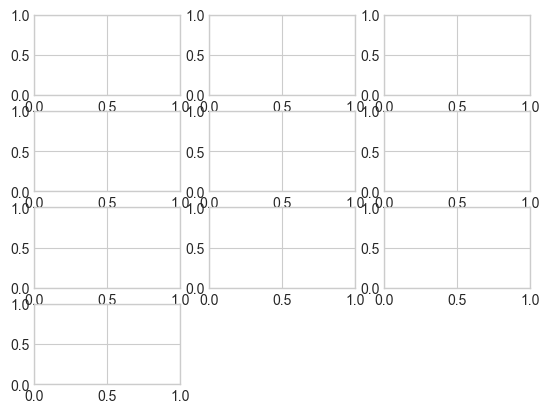

First 5 rows of the data:
   age  has_safety_features  urban_area  speeding_ticket  exposure  \
0   47                    1           0                0  0.583741   
1   37                    1           1                0  0.552284   
2   49                    1           1                0  0.818215   
3   62                    1           0                0  0.853238   
4   36                    0           1                0  0.515793   

   claim_count  observed_freq  
0            0            0.0  
1            0            0.0  
2            0            0.0  
3            0            0.0  
4            0            0.0  

Summary statistics:
               age  has_safety_features   urban_area  speeding_ticket  \
count  1000.000000          1000.000000  1000.000000      1000.000000   
mean     40.155000             0.703000     0.609000         0.151000   
std      13.876005             0.457165     0.488219         0.358228   
min      18.000000             0.000000     0.00

/var/folders/56/fsddj99x0bb1w5gqs1z1j95r0000gn/T/ipykernel_16593/679305637.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = data.groupby('age_group')[['observed_freq', 'predicted_freq']].mean()



Rate Relativities (multiplicative effect on claims):
Intercept: 0.5095 (baseline claims per year)
age: 0.9797 (2.0% decrease in claims)
has_safety_features: 0.7640 (23.6% decrease in claims)
urban_area: 1.7583 (75.8% increase in claims)
speeding_ticket: 1.9719 (97.2% increase in claims)

Claim count distribution:
claim_count
0    788
1    180
2     31
3      1
Name: count, dtype: int64

Dispersion check: variance/mean ratio = 1.0336
There is not evidence of overdispersion

AIC: 1169.53
BIC: -6157.71

Expected annual claims for different risk profiles:
Low risk profile: 0.1544 claims per year
Medium risk profile: 0.3335 claims per year
High risk profile: 1.1241 claims per year


/Users/ekampreetkalsy/.local/share/virtualenvs/predictive-modeling-practice-xjZ6xXHB/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

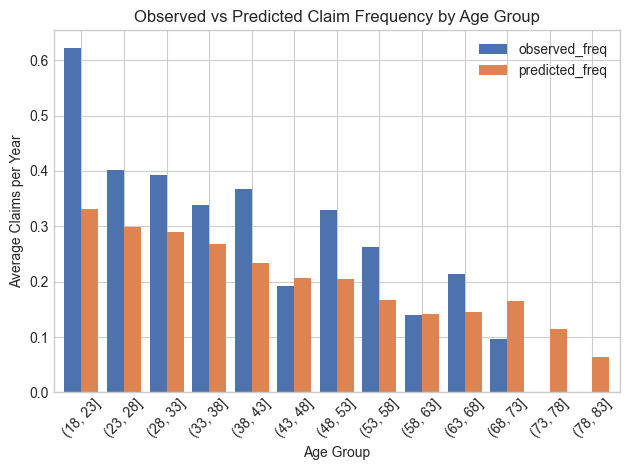

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Generate synthetic insurance claims data
np.random.seed(42)

# Sample size
n = 1000

# Generate predictor variables
age = np.random.normal(40, 15, n)  # Driver age
age = np.clip(age, 18, 80).astype(int)  # Clip to reasonable age range

# Create exposure variable (policy duration in years)
exposure = np.random.uniform(0.5, 1.0, n)  # Policies between 6 months and 1 year

# Create binary variables
has_safety_features = np.random.binomial(1, 0.7, n)  # 70% have safety features
urban_area = np.random.binomial(1, 0.6, n)  # 60% in urban areas
speeding_ticket = np.random.binomial(1, 0.15, n)  # 15% have speeding tickets

# Define the true relationship (log-linear)
log_lambda = (
    -1.5 +  # Baseline claims rate
    -0.02 * (age - 40) +  # Age effect (centered at 40)
    0.5 * urban_area +  # Urban area increases claims
    0.7 * speeding_ticket +  # Speeding tickets increase claims
    -0.3 * has_safety_features  # Safety features decrease claims
)

# Convert to expected claims rate (per year)
lambda_yearly = np.exp(log_lambda)

# Adjust for exposure
lambda_i = lambda_yearly * exposure

# Generate claim counts from Poisson distribution
claim_counts = np.random.poisson(lambda_i)

# Create a DataFrame
data = pd.DataFrame({
    'age': age,
    'has_safety_features': has_safety_features,
    'urban_area': urban_area,
    'speeding_ticket': speeding_ticket,
    'exposure': exposure,
    'claim_count': claim_counts
})

# Calculate observed claim frequency per year
data['observed_freq'] = data['claim_count'] / data['exposure']

# Examine the data
print("First 5 rows of the data:")
print(data.head())

print("\nSummary statistics:")
print(data.describe())

# Fit Poisson GLM with exposure as offset
poisson_model = smf.glm(
    formula="claim_count ~ age + has_safety_features + urban_area + speeding_ticket",
    data=data,
    family=sm.families.Poisson(),
    offset=np.log(data['exposure'])  # Log of exposure as offset
)

poisson_results = poisson_model.fit()
print("\nPoisson GLM Results:")
print(poisson_results.summary())

# Predict expected number of claims for each observation
data['predicted_count'] = poisson_results.predict() * data['exposure']
data['predicted_freq'] = poisson_results.predict()  # This is already per unit of exposure

# Plot observed vs predicted claim frequency
plt.figure(figsize=(12, 6))

# Bin ages for better visualization
data['age_group'] = pd.cut(data['age'], bins=range(18, 85, 5))
age_group_means = data.groupby('age_group')[['observed_freq', 'predicted_freq']].mean()

plt.figure(figsize=(12, 6))
age_group_means.plot(kind='bar', width=0.8)
plt.xlabel('Age Group')
plt.ylabel('Average Claims per Year')
plt.title('Observed vs Predicted Claim Frequency by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()

# Calculate rate relativities (exponentiated coefficients)
print("\nRate Relativities (multiplicative effect on claims):")
relativities = np.exp(poisson_results.params)
for var, rel in zip(poisson_results.params.index, relativities):
    if var == 'Intercept':
        print(f"{var}: {rel:.4f} (baseline claims per year)")
    else:
        effect = (rel - 1) * 100
        direction = "increase" if effect > 0 else "decrease"
        print(f"{var}: {rel:.4f} ({abs(effect):.1f}% {direction} in claims)")

# Assess model quality
# Calculate deviance residuals
data['deviance_residuals'] = poisson_results.resid_deviance

# Analyze the distribution of claim counts
claim_distribution = data['claim_count'].value_counts().sort_index()
print("\nClaim count distribution:")
print(claim_distribution)

# Test for overdispersion
# Under Poisson assumption, mean and variance should be equal
mean_claims = data['claim_count'].mean()
var_claims = data['claim_count'].var()
dispersion_ratio = var_claims / mean_claims
print(f"\nDispersion check: variance/mean ratio = {dispersion_ratio:.4f}")
print(f"There {'is' if dispersion_ratio > 1.5 else 'is not'} evidence of overdispersion")

# Calculate AIC and BIC
print(f"\nAIC: {poisson_results.aic:.2f}")
print(f"BIC: {poisson_results.bic:.2f}")

# Example: Calculate expected claims for specific profiles
def calculate_expected_claims(age, has_safety, urban, speeding, exposure=1.0):
    """Calculate expected number of claims for a specific profile."""
    # Create a DataFrame with the profile
    profile = pd.DataFrame({
        'age': [age],
        'has_safety_features': [has_safety],
        'urban_area': [urban],
        'speeding_ticket': [speeding],
        'exposure': [exposure]
    })
    
    # Calculate linear predictor
    lp = poisson_results.predict(profile)
    
    # Expected claims accounting for exposure
    expected_claims = lp * exposure
    
    return expected_claims[0]

# Example profiles
profiles = [
    {"name": "Low risk", "age": 45, "has_safety": 1, "urban": 0, "speeding": 0},
    {"name": "Medium risk", "age": 35, "has_safety": 1, "urban": 1, "speeding": 0},
    {"name": "High risk", "age": 22, "has_safety": 0, "urban": 1, "speeding": 1}
]

print("\nExpected annual claims for different risk profiles:")
for profile in profiles:
    claims = calculate_expected_claims(
        profile["age"], profile["has_safety"], 
        profile["urban"], profile["speeding"]
    )
    print(f"{profile['name']} profile: {claims:.4f} claims per year")